In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [127]:
df1=pd.read_csv("Skyserver.csv")

In [128]:
df1.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [129]:
print("Shape of dataset:",df1.shape)

Shape of dataset: (10000, 18)


In [130]:
print(df1.columns)

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')


In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [132]:
df1.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

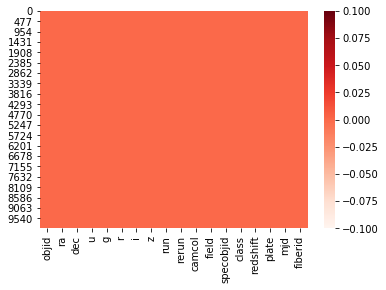

In [133]:
sns.heatmap(df1.isnull(),cmap="Reds")
plt.show()

"Observation1: There are zero null values in the data set."

In [134]:
df1.tail(20)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9980,1.237650e+18,130.770044,51.247639,19.33009,17.37091,16.36515,15.91382,15.53280,1345,301,3,158,5.011830e+17,GALAXY,0.098118,445,51873,573
9981,1.237650e+18,130.692527,51.332803,19.50854,18.11260,17.44901,17.12710,16.84752,1345,301,3,158,5.011820e+17,GALAXY,0.097270,445,51873,568
9982,1.237650e+18,130.745374,51.349638,17.71841,16.63823,16.31214,16.21565,16.16031,1345,301,3,159,5.011840e+17,STAR,-0.000227,445,51873,575
9983,1.237650e+18,130.912335,51.334877,17.93836,16.82273,16.50460,16.40109,16.35758,1345,301,3,159,8.211270e+18,STAR,0.000022,7293,56741,288
9984,1.237650e+18,131.000507,51.311551,19.03042,17.44158,16.60432,16.16952,15.87176,1345,301,3,159,5.011950e+17,GALAXY,0.095191,445,51873,616
9985,1.237650e+18,130.766303,51.325652,17.12925,15.53226,14.74467,14.31073,13.90751,1345,301,3,159,5.011850e+17,GALAXY,0.030481,445,51873,580
9986,1.237650e+18,131.050203,51.391819,19.37797,17.91853,17.10964,16.68906,16.36748,1345,301,3,160,5.011940e+17,GALAXY,0.093830,445,51873,613
9987,1.237650e+18,131.094692,51.376030,19.26109,18.13306,17.52770,17.09327,16.84574,1345,301,3,160,5.011950e+17,GALAXY,0.098805,445,51873,617
9988,1.237650e+18,131.110555,51.388998,18.56496,16.80870,15.82913,15.36071,14.98890,1345,301,3,160,5.011910e+17,GALAXY,0.095859,445,51873,602
9989,1.237650e+18,131.087729,51.405911,18.50840,16.51681,15.54049,15.09710,14.77027,1345,301,3,160,5.011920e+17,GALAXY,0.096816,445,51873,606


Observation 2: There are no special symbols also not present in the dataset.

# Checking the distribution of class:

In [135]:
print(df1.groupby("class").size())

class
GALAXY    4998
QSO        850
STAR      4152
dtype: int64


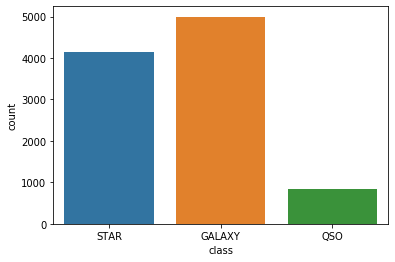

In [136]:
sns.countplot(df1["class"])
plt.show()

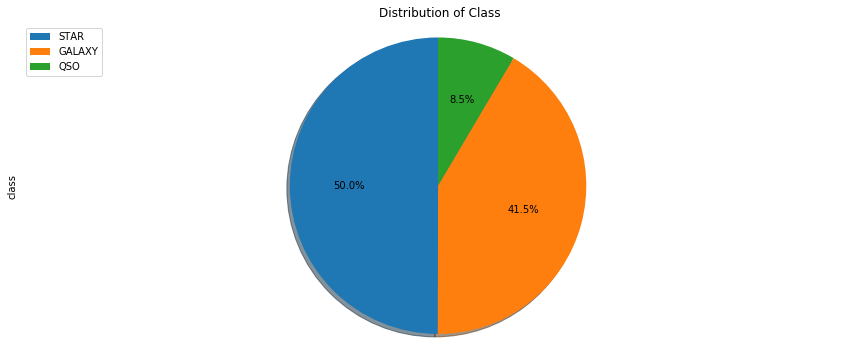

In [137]:
labels = 'STAR','GALAXY', 'QSO'
df1['class'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Class') 
plt.axis('equal') 
plt.legend(labels=labels, loc='upper left') 
plt.show()

Observation:3 Here we can see the distribution of our target, Star is 50% while Galaxy is 41.5% and Quasar is 8.5%

#  Exploratory Data Analysis

In [138]:
df1.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


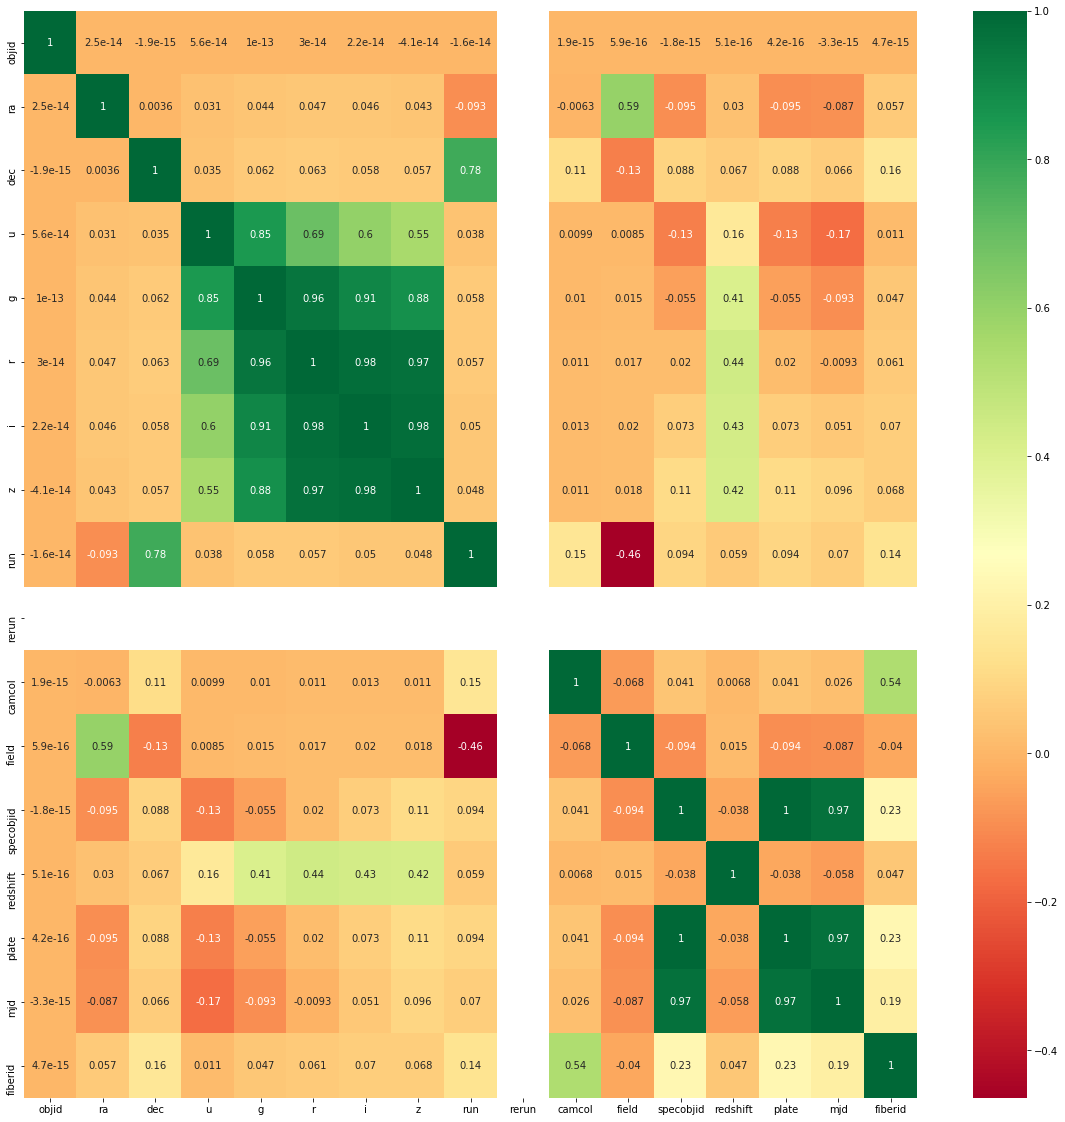

In [139]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),cmap="RdYlGn",annot=True)
plt.show()

In [140]:

abs(df1.corr())

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,4.107700e-14,1.553011e-14,NaN,1.921887e-15,5.938881e-16,1.829075e-15,5.085882e-16,4.156934e-16,3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,9.274056e-02,NaN,6.293831e-03,5.946996e-01,9.532711e-02,3.030740e-02,9.532933e-02,8.688726e-02,5.748482e-02
dec,1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,1.294293e-01,1.637409e-01,1.294304e-01,1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,5.497908e-02,4.075763e-01,5.498078e-02,9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,1.553011e-14,9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["class"]=le.fit_transform(df1["class"].astype(str))
df1["class"].unique()

array([2, 0, 1])

In [142]:
df1["class"].head(20)

0     2
1     2
2     0
3     2
4     2
5     2
6     0
7     2
8     2
9     0
10    2
11    2
12    2
13    2
14    0
15    1
16    2
17    1
18    2
19    0
Name: class, dtype: int32

So Star=0,Quars=1,Galaxy=2

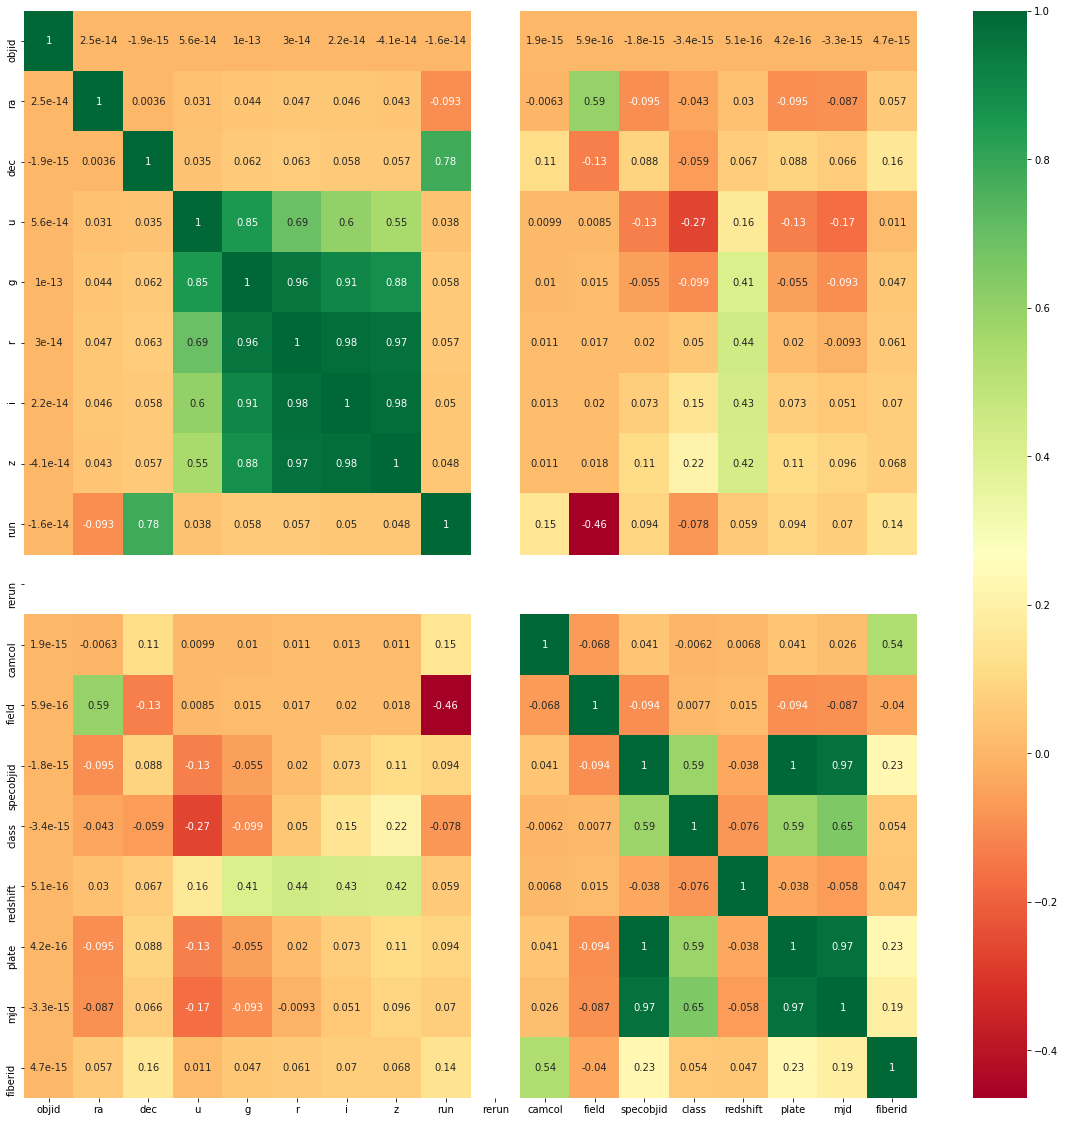

In [143]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),cmap="RdYlGn",annot=True)
plt.show()

here we can see specobjid and plate are correlated so we can drop specobjid also Objid seems no use in our predictions so droping it also.

In [144]:
df1.drop(['objid','specobjid'], axis=1, inplace=True)

In [145]:
df1.shape

(10000, 16)

On searching understood that The features 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment when making the observation hence they can be eliminated.

In [146]:
df1.drop(['run', 'rerun', 'camcol', 'field'], axis=1, inplace=True)

In [147]:
df1.shape

(10000, 12)

again checking corealtion

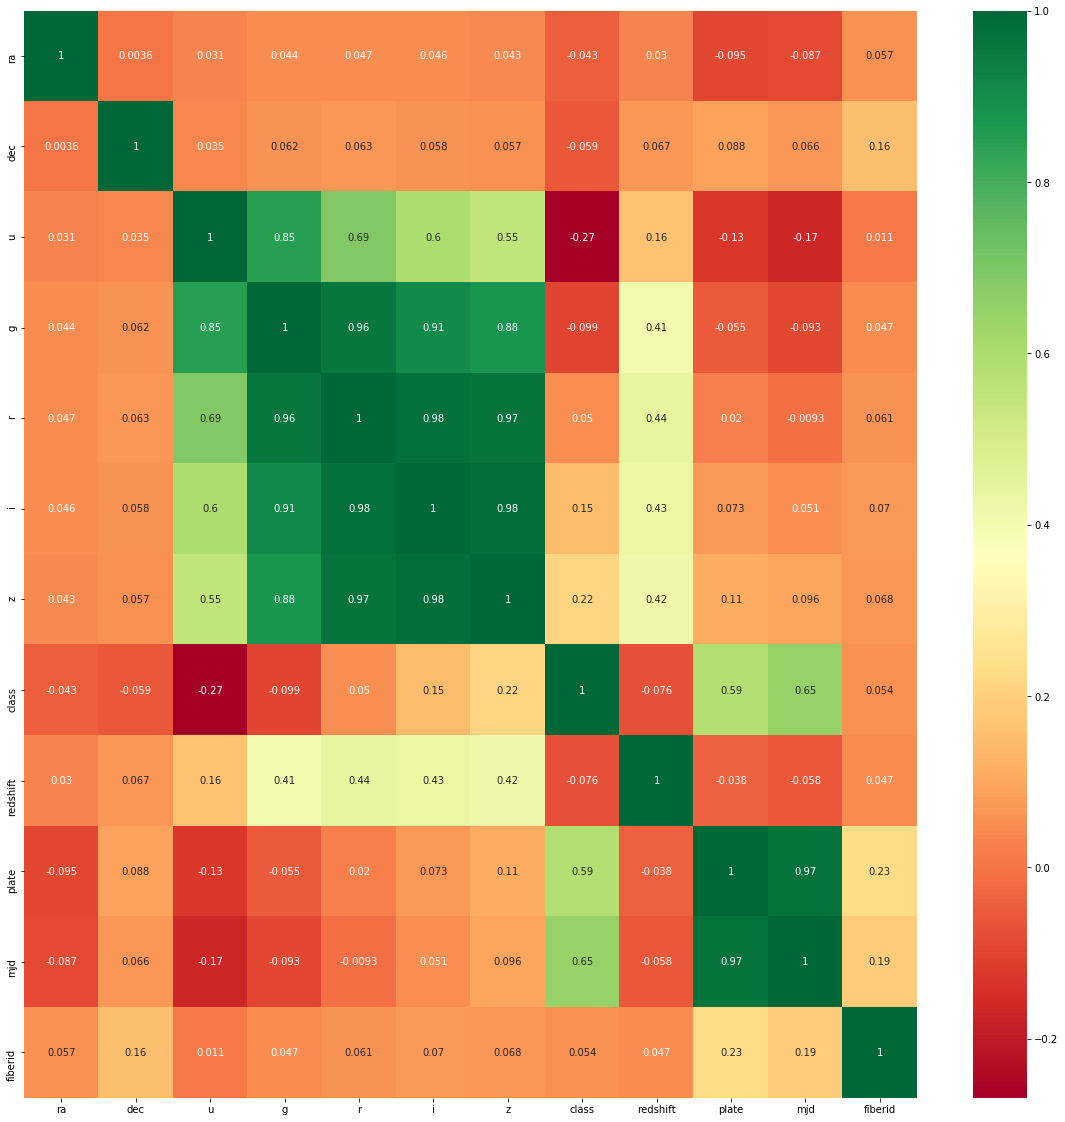

In [148]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),cmap="RdYlGn",annot=True)
plt.show()

In [149]:
df1.keys()

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'],
      dtype='object')

# Visualising the data 

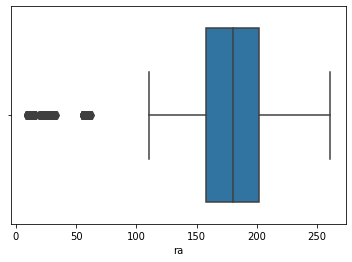

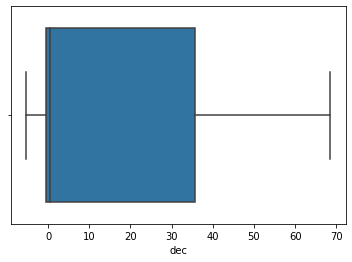

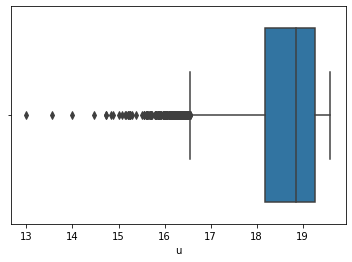

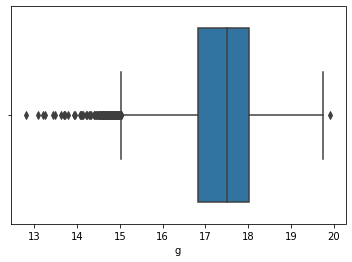

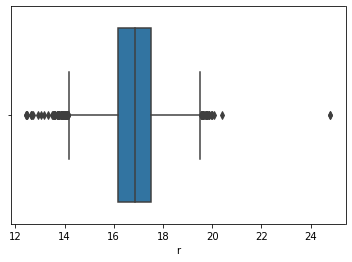

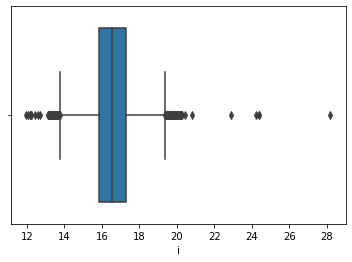

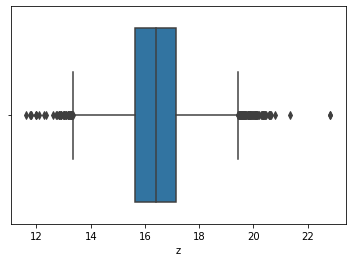

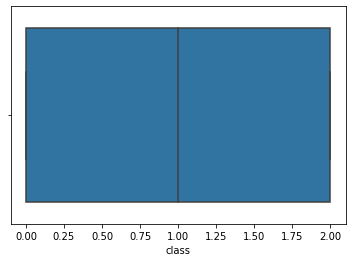

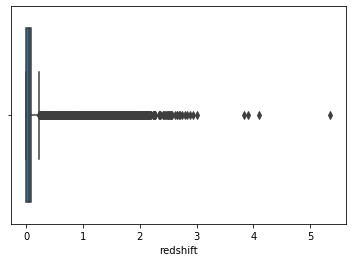

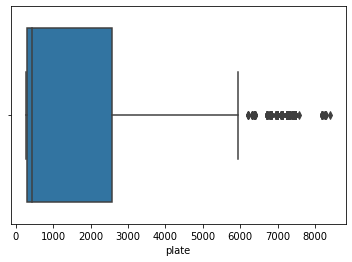

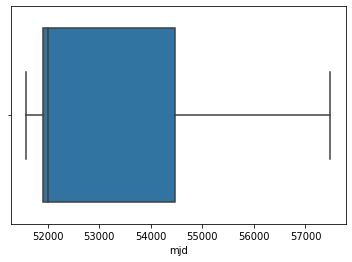

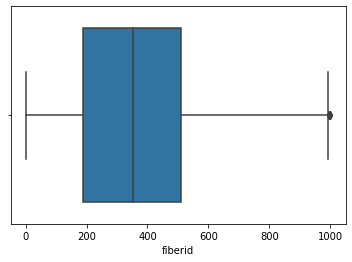

In [150]:
for i in df1.columns:
    sns.boxplot(x=df1[i])
    plt.show()

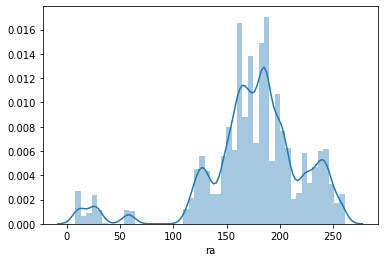

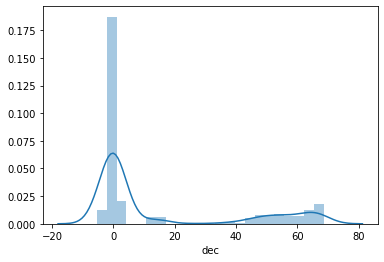

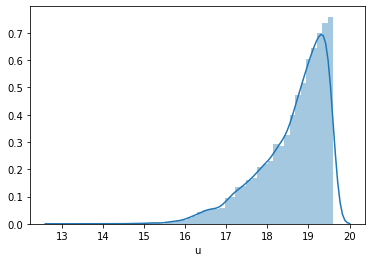

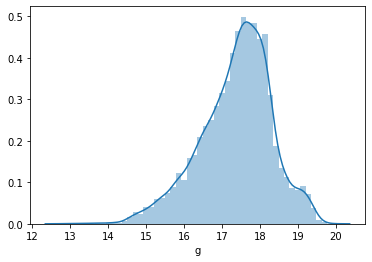

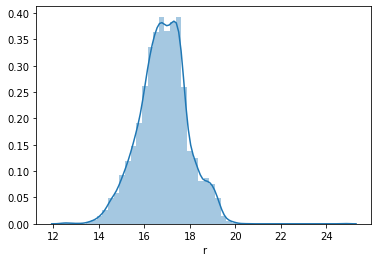

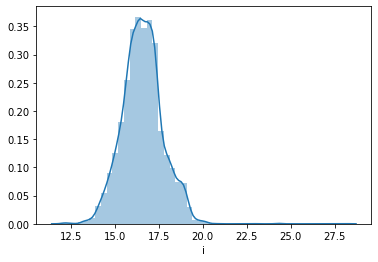

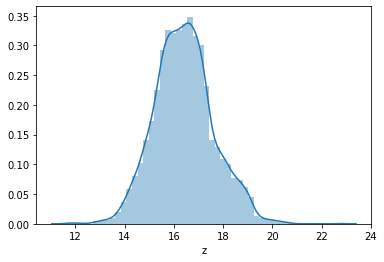

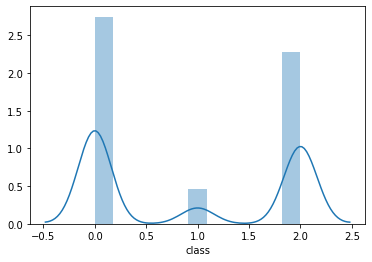

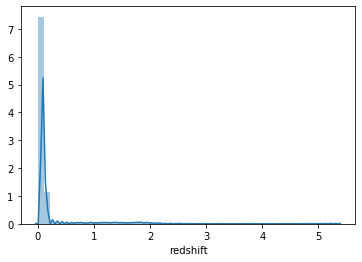

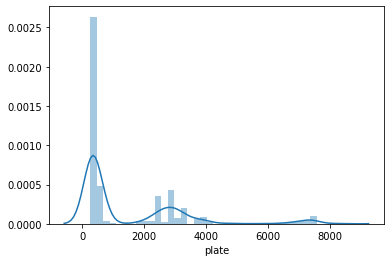

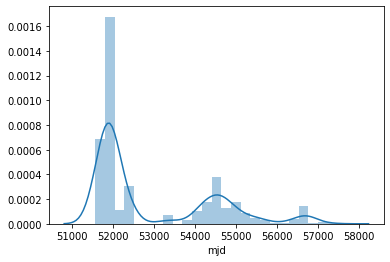

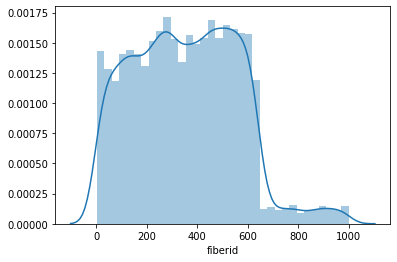

In [151]:
for i in df1.columns:
    sns.distplot(df1[i])
    plt.show()

# Multivariate Anaysis 

In [152]:
df1.keys()

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'],
      dtype='object')

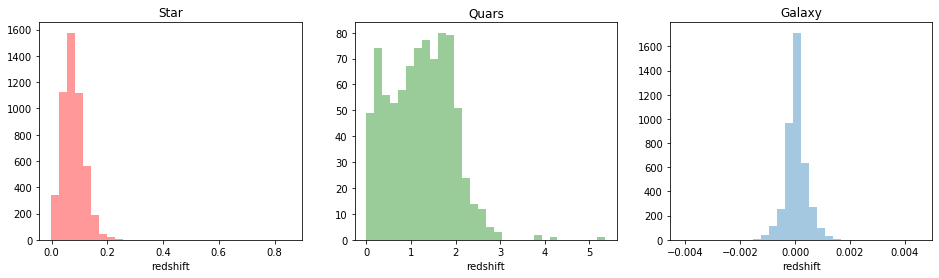

In [153]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(df1[df1['class']==0].redshift, bins = 30, ax = axes[0], kde = False,color="red")
ax.set_title("Star")
ax = sns.distplot(df1[df1['class']==1].redshift, bins = 30, ax = axes[1], kde = False,color="green")
ax.set_title("Quars")
ax = sns.distplot(df1[df1['class']==2].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Galaxy')
plt.show()

Observation: Here we observed that value of redshift varies for star,galaxy and Quaras
    1) Redshift for star is slightly right skeewed
    2) for glaxy its clear a normal distribution
    while for Quars also data is right skeewed

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

So now checking how ra and dec impacts the target value

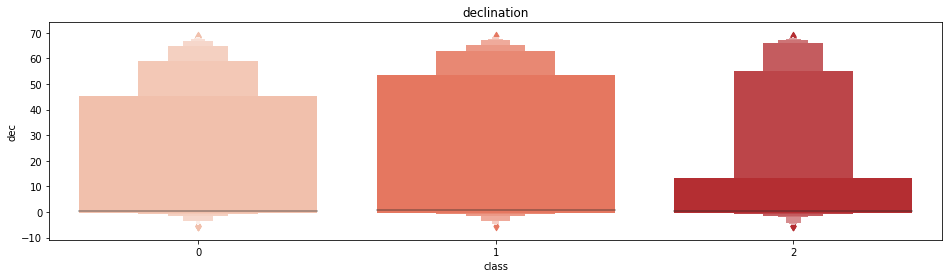

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 4))
ax = sns.boxenplot(x=df1['class'], y=df1['dec'],palette='Reds')
ax.set_title('declination')
plt.show()

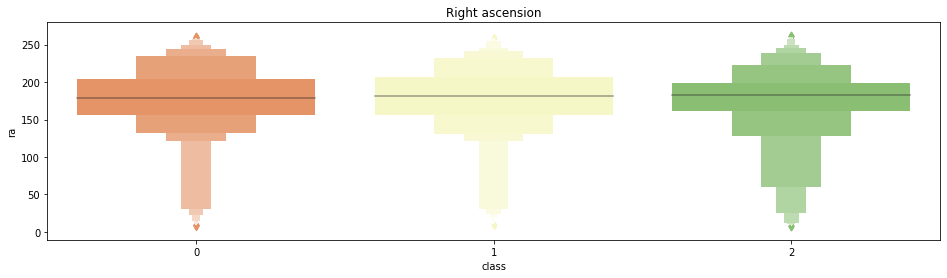

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 4))
ax = sns.boxenplot(x=df1['class'], y=df1['ra'],palette='RdYlGn')
ax.set_title('Right ascension')
plt.show()

In [97]:
df1.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [98]:
for i in df1.columns:
    if df1.skew().loc[i]>0.55:
        df1[i]=np.log1p(df1[i]) # using log transform we are normalizing the dataset

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [157]:
df1.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [159]:
df2=df1

# Model Building

In [160]:
from sklearn.decomposition import PCA
# Principal Component Analysis
pca = PCA(n_components=3)
ugriz = pca.fit_transform(df2[['u', 'g', 'r', 'i', 'z']])

# update dataframe 
df2 = pd.concat((df2, pd.DataFrame(ugriz)), axis=1)
df2.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
df2.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
df2.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,2,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598371,0.135285,2,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,0,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,2,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,2,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


In [163]:
#Splitting the data 
x=df2.drop(columns="class")
y=df2[["class"]]

In [164]:
print(x.shape)
print(y.shape)


(10000, 9)
(10000, 1)


In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=0.20)

# Random Forest

In [169]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for i in range(101):
    rf = RandomForestClassifier(random_state=i)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_test,y_pred_rf)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy

        
print(max_accuracy)


99.55
[[6.93832273e-01 7.40254729e-02 7.70273543e-04 ... 3.85886269e-01
  6.93479470e-02 3.87685349e-01]
 [6.94097640e-01 7.46422070e-02 7.61699432e-04 ... 4.48109611e-01
  2.15263802e-01 4.15556484e-01]
 [6.94421555e-01 7.45191099e-02 2.37490694e-02 ... 5.18964263e-01
  1.54511150e-01 4.90959246e-01]
 ...
 [4.88097418e-01 7.71724013e-01 6.96997371e-04 ... 5.27652687e-01
  2.60386724e-01 4.22955603e-01]
 [4.87798936e-01 7.72888457e-01 3.38840082e-03 ... 5.23447184e-01
  2.30994024e-01 4.65101058e-01]
 [4.88542500e-01 7.73595116e-01 2.28730132e-02 ... 4.12978041e-01
  9.79147122e-02 4.54925954e-01]]


In [171]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1023
           1       0.99      0.97      0.98       173
           2       0.99      1.00      1.00       804

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000




Classification Report Terms
precision - It is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

recall - It is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

f1-score -This can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

support - It is the number of occurrences of each class in y_true.

micro avg - Calculate metrics globally by counting the total true positives, false negatives and false positives.

macro avg - Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

weighted avg - Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [186]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.995   0.99375 0.99    0.99125 0.98875 0.99    0.98875 0.9875  0.9975
 0.9875 ]
Mean: 0.991
Standard Deviation: 0.0032015621187164245


In [192]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rfc_cv, x, y, cv=3)
confusion_matrix(df1["class"], predictions)

array([[4948,   26,   24],
       [  26,  823,    1],
       [  11,    0, 4141]], dtype=int64)

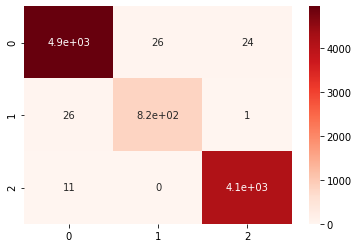

<Figure size 1440x720 with 0 Axes>

In [196]:
sns.heatmap(confusion_matrix(df1["class"], predictions),cmap="Reds",annot=True)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# K Nearest Neighbors

In [185]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)
accuracy = round(accuracy_score(y_test,y_pred_KNN)*100,2)
        
print("Accuracy:",accuracy)
print()
print("Classification Report:")
print(classification_report(y_test,y_pred_KNN))

Accuracy: 94.1

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1023
           1       0.99      0.83      0.90       173
           2       0.95      0.93      0.94       804

    accuracy                           0.94      2000
   macro avg       0.96      0.91      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [197]:
confusion_matrix(y_test,y_pred_KNN)

array([[990,   0,  33],
       [ 20, 143,  10],
       [ 54,   1, 749]], dtype=int64)

So as we can see random forest is performing better so selecting the Random forest classifier model

In [198]:
from sklearn.externals import joblib
joblib.dump(rf,"SDSS.pkl")

['SDSS.pkl']